In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib import style

In [2]:
# To see all the columns 
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 300)

In [3]:
df = pd.read_csv("C://CompletePython//DataScience//BigData/LoanStats.csv")

In [4]:
df.shape

(39786, 7)

In [5]:
df.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


In [6]:
## Interest rate is your target variable.
df.dtypes

int_rate          float64
loan_amnt           int64
term                int64
grade              object
home_ownership     object
annual_inc        float64
purpose            object
dtype: object

In [7]:
df.describe()

,int_rate,loan_amnt,term,annual_inc
count,39786.000000,39786.000000,39786.000000,3.978600e+04
mean,12.027873,11231.360277,42.448499,6.897907e+04
std,3.727466,7464.542832,10.638782,6.376263e+04
min,5.420000,500.000000,36.000000,4.000000e+03
25%,9.250000,5500.000000,36.000000,4.050000e+04
50%,11.860000,10000.000000,36.000000,5.900000e+04
75%,14.590000,15000.000000,60.000000,8.234250e+04
max,24.590000,35000.000000,60.000000,6.000000e+06


In [8]:
df.isna().sum().sum()

0

### NOTES:
    1. No null values 
    2. There is no column with the 
    

In [9]:
df.groupby('grade')['grade'].agg('count')

grade
A    10085
B    12035
C     8111
D     5325
E     2858
F     1054
G      318
Name: grade, dtype: int64

In [10]:
df.groupby('term')['term'].agg('count')

term
36    29096
60    10690
Name: term, dtype: int64

### OUTLIER DETECTION AND REMOVAL

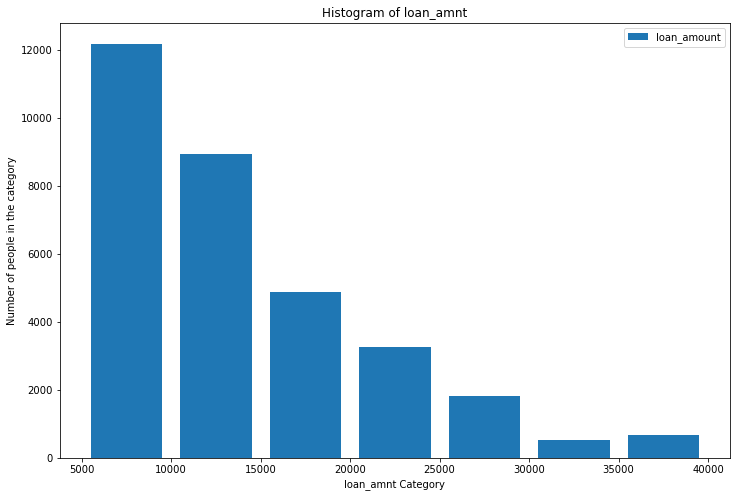

In [11]:
bins = [5000,10000,15000,20000,25000,30000,35000,40000]
plt.figure(figsize=(12,8))
plt.hist(df['loan_amnt'],bins, rwidth=0.8, label="loan_amount")
plt.title("Histogram of loan_amnt")
plt.xlabel("loan_amnt Category")
plt.ylabel("Number of people in the category")
plt.legend()


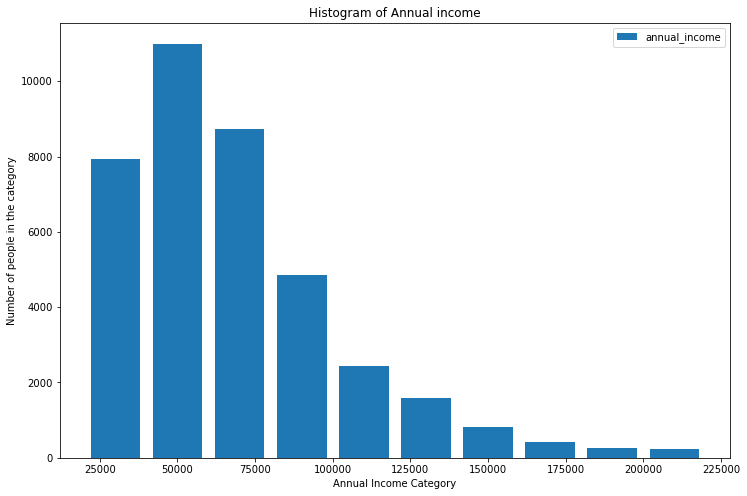

In [12]:
bins = [20000,40000,60000,80000,100000,120000,140000,160000,180000,200000, 220000]
plt.figure(figsize=(12,8))
plt.hist(df['annual_inc'],bins, rwidth=0.8, label="annual_income")
plt.title("Histogram of Annual income")
plt.xlabel("Annual Income Category")
plt.ylabel("Number of people in the category")
plt.legend()

NOTES:
1. Annual income and Loan amount both are right skewed
2. People with higher income have less tendency for applying loans
3. People with income between 20000 to 75000 are the ones who apply for the more loans
4. Most of the loans taken range between 5000 to 15000


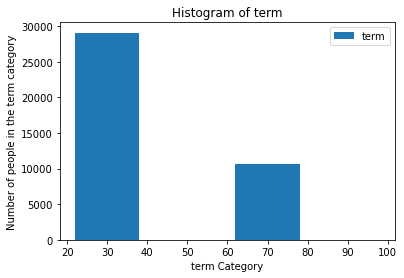

In [13]:
bins = [20,40,60,80,100]
plt.hist(df['term'],bins,rwidth=0.8, label="term")
plt.title("Histogram of term")
plt.xlabel("term Category")
plt.ylabel("Number of people in the term category")
plt.legend()

In [19]:
import seaborn as sns

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


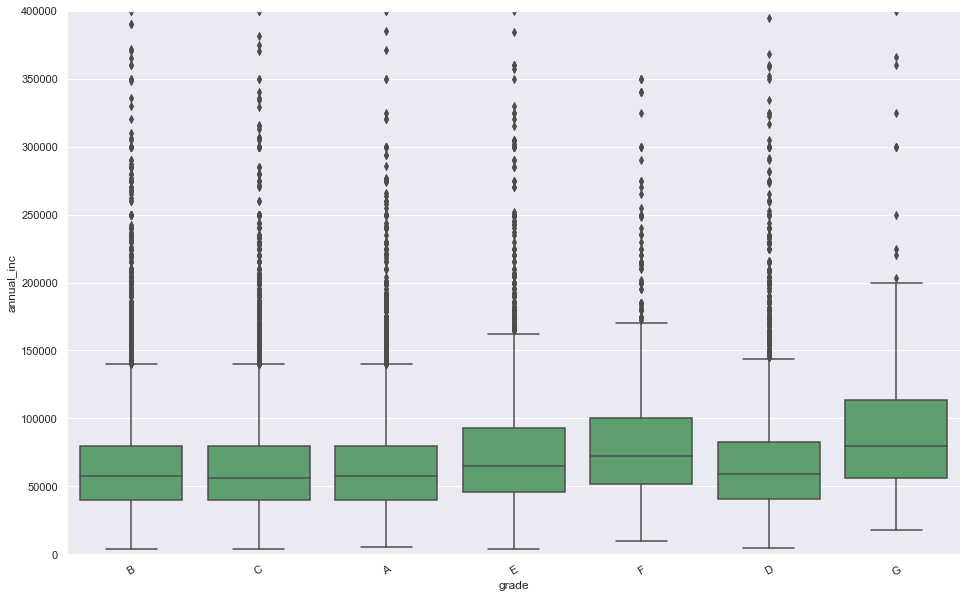

In [20]:
sns.set(rc={'figure.figsize':(16,10)})
x=df['grade']
y=df['annual_inc']
ax = sns.boxplot(x,y,color='g')
ax.set(ylim=(0, 400000))
ax.tick_params(axis='x', rotation=30)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


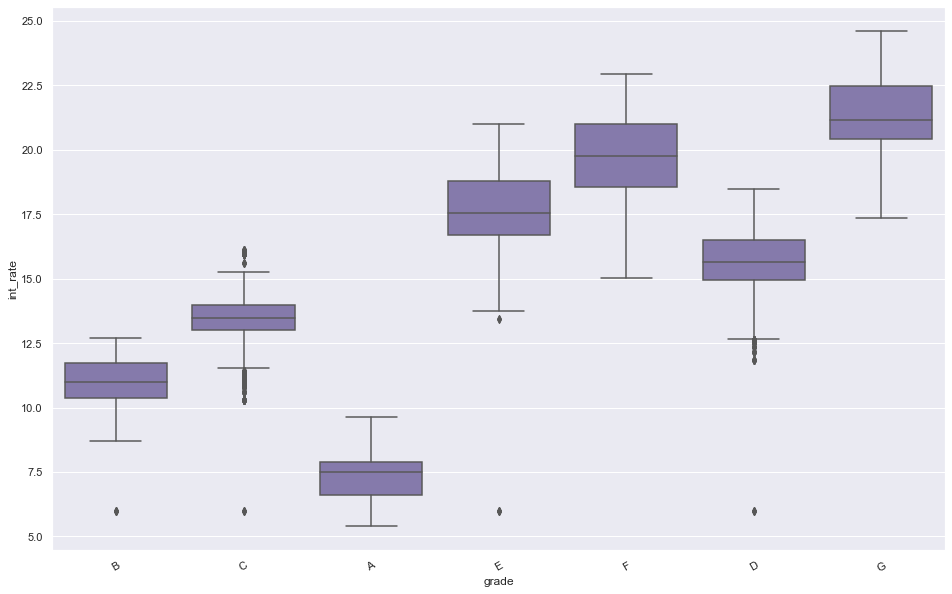

In [21]:
sns.set(rc={'figure.figsize':(16,10)})
x=df['grade']
y=df['int_rate']
ax = sns.boxplot(x,y,color='m')
ax.tick_params(axis='x', rotation=30)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


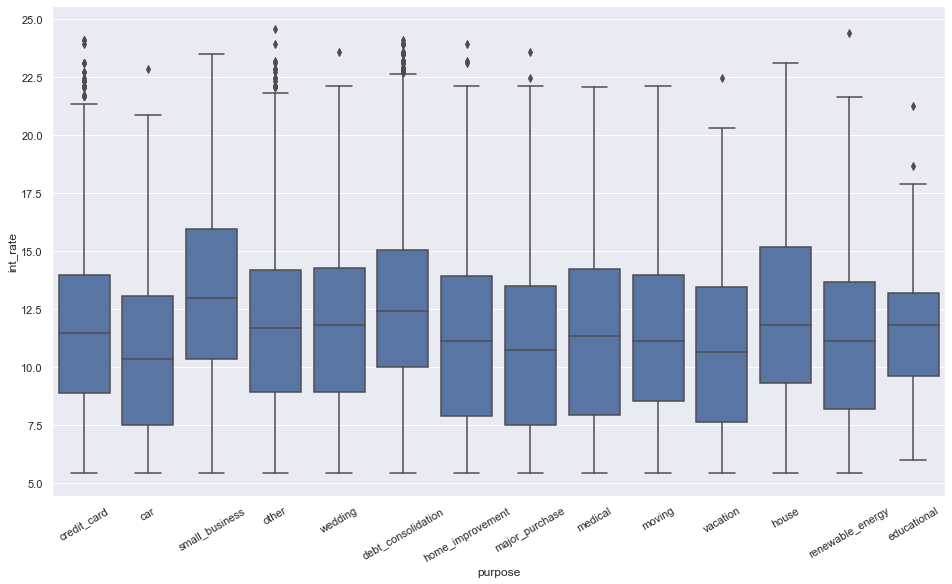

In [22]:
sns.set(rc={'figure.figsize':(16,9)})
x=df['purpose']
y=df['int_rate']
ax = sns.boxplot(x,y,color='b')
ax.tick_params(axis='x', rotation=30)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


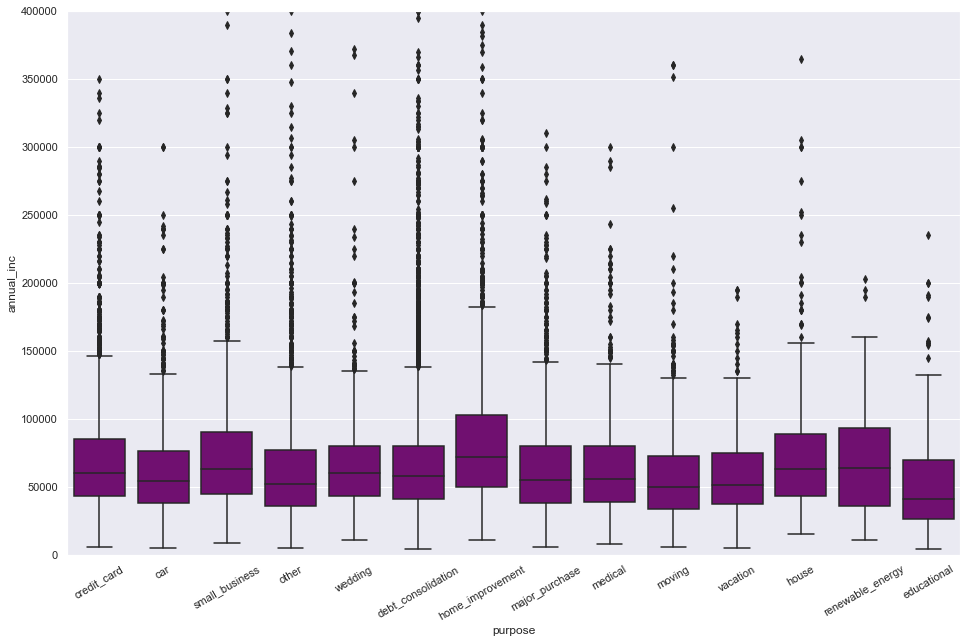

In [23]:
sns.set(rc={'figure.figsize':(16,10)})
x=df['purpose']
y=df['annual_inc']
ax = sns.boxplot(x,y,color='purple')
ax.set(ylim=(0, 400000))
ax.tick_params(axis='x', rotation=30)

Notes:
1. From the above data we can make out that there are multiple outliers for different categories.


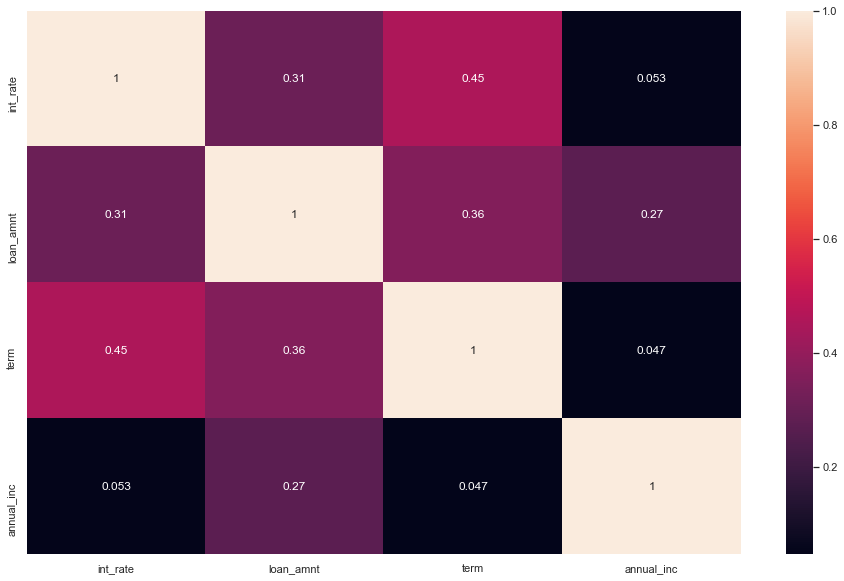

In [24]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Notes:
1. The features look quite important and correlated. Hence not dropping any columns


In [25]:
# OUTLIER REMOVAL for columns using 3s rule

In [26]:
columns = ['int_rate', 'loan_amnt', 'annual_inc'] # one or more
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [28]:
df.shape

(36943, 7)

In [29]:
df.isna().sum().sum()

0

### End OF EDA and DATA CLEANING

### FEATURE ENGINEERING OF COLUMNS

In [30]:
# Normalize the data
from sklearn.preprocessing import minmax_scale
df[['int_rate', 'loan_amnt', 'annual_inc']] = minmax_scale(df[['int_rate', 'loan_amnt', 'annual_inc']])

# Encode the data
# Nominal data encoding 
df=pd.get_dummies(df, columns=['home_ownership','purpose'], drop_first=True)

In [32]:
# Ordinal data encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.grade  = le.fit_transform(df.grade)
df.term  = le.fit_transform(df.term)

In [33]:
df.head(2)

,int_rate,loan_amnt,term,grade,annual_inc,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.306565,0.156931,0,1,0.141836,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0.577374,0.069747,1,2,0.184387,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### SPLIT THE DATA TO TEST AND TRAIN 

In [36]:
# X as the feature and y as the target
X = df.loc[:, df.columns !="int_rate"]
y = df.loc[:, df.columns =="int_rate"]


In [37]:
X.shape

(36943, 21)

In [38]:
y.shape

(36943, 1)

In [35]:
# Test and train split with 80:20 rule
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [39]:
## MODEL building
### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

# MODEL 1 
## Simple Linear Regression

In [42]:
model = LinearRegression()
# Training the model using train data
model.fit(X_train, y_train)
# Testing the trained model with the test data
model.score(X_test, y_test)

0.8947219408441885

NOTES: The model scored 89% which is a good score

# MODEL 2
## Linear Regression with hyptertuning

In [43]:
# Use different parameters for seeing the best optimal model
# TO RANDOMIZE THE SAMPLE
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.89472194, 0.89813108, 0.89566205, 0.89859811, 0.90057376])

NOTES: Getting the consistent score for 89 to 90%


# MODELs more than 8:
## Grid Search  to run model on different regressor and parameters to get best score

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [51]:
def find_best_using_gridsearch_cv(X,y):
    ### Define 3 different algorightms in dictionary 
    algos = {
         'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }  
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [52]:
find_best_using_gridsearch_cv(X,y)

,model,best_score,best_params
0,linear_regression,0.897537,{'normalize': True}
1,lasso,-0.000395,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.851199,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.
Since Linear Regression is currently the best model, lets evaluate the model with Root Mean Square Error.

In [53]:
# Make predictions using the trained dataset initially with Linear Regression
y_pred = model.predict(X_test)

In [54]:
y_pred

array([[0.47315955],
       [0.33181102],
       [0.28327033],
       ...,
       [0.56294696],
       [0.31061989],
       [0.90237342]])

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8947219408441885

#### The above shows that the r2socre is not 1 and performing 0.89 so not overfitting.
#### Since the results of r2score error is not near to zero, the model is not underfitting.
### HENCE THE LINEAR REGRESSION MODEL IS PEFORMING WELL FOR THIS DATASET.